# Predicting the name of fruits 

The above dataset was found in Kaggle and I am just using it for practising my skills

# Data Preparation

In [1]:
##importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('fruit_data_with_colors.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
data.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB


In [5]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
data['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [7]:
predct = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [8]:
apple_data=data[data['fruit_name']=='apple']
orange_data=data[data['fruit_name']=='orange']
lemon_data=data[data['fruit_name']=='lemon']
mandarin_data=data[data['fruit_name']=='mandarin']

In [9]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [10]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [11]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


In [12]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


# Data Exploration

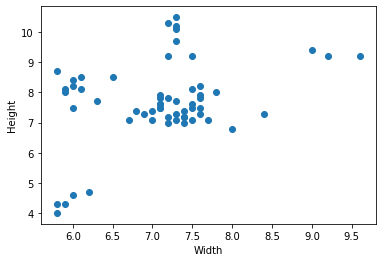

In [15]:
plt.scatter(data['width'], data['height'])
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

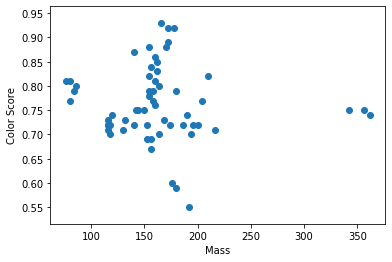

In [16]:
plt.scatter(data['mass'], data['color_score'])
plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.show()

# Data Modelling 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
X=data[['mass','width','height']]
Y=data['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [19]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [20]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


In [21]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
knn.score(X_test,y_test)

0.5333333333333333

In [23]:
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

C:\Users\Windows-10\anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\Windows-10\anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


'lemon'

In [24]:
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

C:\Users\Windows-10\anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\Windows-10\anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


'orange'

Hence, this is how we were able to predict the fruits based on classification.